# EECS 504 Homework 2

## Problem 1: Implement neural network layers from scratch

In this assignment, you'll learn and practice implementing forward and backward pass for different layers used in neural networks. You'll implement two different classifier models - MultiLayer Perceptron and CNN classifier, and train these on CIFAR-10 and MNIST datasets respectively.

### Getting Started
Make your own copy of this notebook using **File -> Save a copy in Drive**, or if you have iPython installed locally, **File -> Download .ipynb** to do the exercises locally.

### Submitting
When you're ready to submit this problem, first run all of the code to ensure your outputs are included in the submission. Save the `.ipynb` file and submit it to Canvas as `HW2.1_<uniqname>.ipynb`, substituting your uniqname. Be sure your name, uniqname, and UMID are correct in the form fields below. 

**We would also want you to include a pdf version of your final notebook with outputs in your canvas submission, alongwith .ipynb file. You can follow these steps to save a pdf version. After completing your code and running all cells to include output, you can go to File -> Print -> Save as pdf and choose Landscape mode in Colab. Naming convention is same as that for .ipynb file.**


If you want to preview how it will look when we grade it, we'll run a command similar to the one below:

`ipython nbconvert --to html HW2.1_<uniqname>.ipynb`

In [15]:
#@title Grading information
Name = 'Yuan Cheng' #@param {type: 'string'}
Uniqname = 'yuacheng' #@param {type: 'string'}
UMID = '06358288' #@param {type: 'string'}

# Starting

Run the following code to import the modules and download all the files you'll need..

In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision.datasets import CIFAR10
import math
from keras.datasets import mnist
download = not os.path.isdir('cifar-10-batches-py')
dset_train = CIFAR10(root='.', download=download)

# Problem 1.1 Multi-layer perceptron
In this problem you will develop a two Layer neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

You'll implement the following network architecture: 

input - fully connected layer - ReLU - fully connected layer - softmax

The output of the network are the scores for each class. And we will train this network with a cross entropy loss function. In our implementation here, softmax_loss() function will compute softmax activation for the output of last fully-connected layer and calculate cross-entropy loss.

You cannot use any deep learning libraries such as PyTorch in this part.

# Layers
In this problem, implement fully connected layer, relu and softmax. Filling in all TODOs in skeleton codes will be sufficient.

In [17]:
def fc_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    
    The input x has shape (N, Din) and contains a minibatch of N
    examples, where each example x[i] has shape (Din,).
    
    Inputs:
    - x: A numpy array containing input data, of shape (N, Din)
    - w: A numpy array of weights, of shape (Din, Dout)
    - b: A numpy array of biases, of shape (Dout,)
    
    Returns a tuple of:
    - out: output, of shape (N, Dout)
    - cache: (x, w, b)
    """
    ###########################################################################
    # TODO: Implement the forward pass. Store the result in out.              #
    ###########################################################################
    out_part1 = np.dot(x, w)
    out = out_part1 + b

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    
    return out, cache


def fc_backward(dout, cache):
    """
    Computes the backward pass for a fully_connected layer.
    
    Inputs:
    - dout: Upstream derivative, of shape (N, Dout)
    - cache: returned by your forward function. Tuple of:
      - x: Input data, of shape (N, Din)
      - w: Weights, of shape (Din, Dout)
      - b: Biases, of shape (Dout,)
      
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, Din)
    - dw: Gradient with respect to w, of shape (Din, Dout)
    - db: Gradient with respect to b, of shape (Dout,)
    """
    x, w, b = cache
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    dx = np.dot(dout, w.T)
    dw = np.dot(x.T, dout)
    db = np.sum(dout, axis=0)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db

def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    out = np.maximum(0,x)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache


def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: returned by your forward function. Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
     

    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    x = cache
    dout[x <= 0] = 0
    dx = dout
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx


def softmax_loss(x, y):
    """
    Computes the softmax activation of the input and calculates the 
    cross-entropy loss. 
    Also computes the gradient of the loss with respect to the input. 
    
    For testing, input y is None and only compute the softmax activation of 
    the input.

    Inputs:
    - x: Input data, of shape (N, C) - this should be the output of the last 
    fully connected layer
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C or None

    if y is None:
      Returns:
      - scores : Vector of class scores, of shape (N,C) - this should be 
      softmax activation of the input
    else:
      Returns a tuple of:
      - loss: Scalar giving the loss
      - dx: Gradient of the loss with respect to x
    
    """
    ###########################################################################
    # TODO: Implement softmax loss                                            #
    ###########################################################################
    exp_scores = np.exp(x)
    sum_exp_scores = np.sum(exp_scores, axis = 1, keepdims = True)
    log_values = np.log(sum_exp_scores)
    loss = - np.sum(log_values)
    probs = exp_scores / sum_exp_scores
    loss = loss / x.shape[0]
    dx = exp_scores
    for i in range(x.shape[0]):
      dx[i, y[i]] -= 1
    dx = dx / x.shape[0]

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    if y is None:
      return scores
    else:
      return loss, dx


# MLP Classifier

In this problem, implement MLP classifier.

In [18]:
class MLPClassifier(object):
    """
    A fully-connected neural network that uses a modular layer design.
    We assume an input dimension of D, a hidden dimension of H, and perform
    classification over C classes.

    The architecture should be input - fc - relu - fc - softmax

    The learnable parameters of the model are stored in the dictionary
    self.params that maps parameter names to numpy arrays.
    """

    def __init__(self, input_dim=3072, hidden_dim=300, num_classes=10,
                 weight_scale=1e-3):
        """
        Initialize a new network.

        Inputs:
        - input_dim: An integer giving the size of the input
        - hidden_dim: An integer giving the size of the hidden layer, None
          if there's no hidden layer.
        - num_classes: An integer giving the number of classes to classify
        - weight_scale: Scalar giving the standard deviation for random
          initialization of the weights.
        """
        self.params = {}
        self.hidden_dim = hidden_dim
        ############################################################################
        # TODO: Initialize the weights and biases of the two-layer net. Weights    #
        # should be initialized from a Gaussian centered at 0.0 with               #
        # standard deviation equal to weight_scale, and biases should be           #
        # initialized to zero. All weights and biases should be stored in the      #
        # dictionary self.params, with fc weights and biases using the keys        #
        # 'W' and 'b', i.e., W1, b1 for the weights and bias in the first linear   #
        # layer, W2, b2 for the weights and bias in the second linear layer.       #
        # Hint: np.random.normal
        ############################################################################
        W1 = np.random.normal(0, weight_scale, size=(input_dim, hidden_dim))
        b1 = np.zeros(hidden_dim)
        W2 = np.random.normal(0, weight_scale, size=(hidden_dim, num_classes))
        b2 = np.zeros(num_classes)
        self.params['W1'] = W1
        self.params['b1'] = b1
        self.params['W2'] = W2
        self.params['b2'] = b2
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################


    def forwards_backwards(self, X, y=None):
        """
        Do a forward and backward pass through the network.
        i.e. Compute loss and gradient for a minibatch of data.

        Inputs:
        - X: Array of input data of shape (N, Din)
        - y: Array of labels, of shape (N,). y[i] gives the label for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return:
        - scores: Array of shape (N, C) giving classification scores, where
          scores[i, c] is the classification score for X[i] and class c.

        If y is not None, then run a training-time forward and backward pass. And
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
          names to gradients of the loss with respect to those parameters.
        """

        ############################################################################
        # TODO: Implement the forward pass for the two-layer net, computing the    #
        # class scores for X and storing them in the scores variable.              #
        ############################################################################
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2']
        b2 = self.params['b2']
        input_2_hidden1, cache1 = fc_forward(X, W1, b1)
        hidden1_out, cache2 = relu_forward(input_2_hidden1)
        scores,cache3 = fc_forward(hidden1_out, W2, b2)
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################
        # If y is None then we are in test mode so just return scores
        if y is None:
            return scores

        grads = {}
        ############################################################################
        # TODO: Implement the backward pass for the two-layer net. Store the loss  #
        # in the loss variable and gradients in the grads dictionary. Compute data #
        # loss using softmax, and make sure that grads[k] holds the gradients for  #
        # self.params[k].                                                          # 
        ############################################################################
        loss, dscores = softmax_loss(scores, y)
        dh2, dw2, db2 = fc_backward(dscores, cache3)
        dx = relu_backward(dh2, cache2)
        _, dw1, db1 = fc_backward(dx, cache1)
        grads['W2'] = dw2
        grads['b2'] = db2
        grads['W1'] = dw1
        grads['b1'] = db1

        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################
        return loss, grads

  

# Training and evaluation functions
In the following section, we provide you helper functions to train your neural network model and evaluate your trained model on test/validation set. 

You are not required to implement anything here.

In [19]:
def test_network(model, X, y, num_samples=None, batch_size=100):
    """
    Check accuracy of the model on the provided data.

    Inputs:
    - model: Image classifier
    - X: Array of data, of shape (N, d_1, ..., d_k)
    - y: Array of labels, of shape (N,)
    - num_samples: If not None, subsample the data and only test the model
      on num_samples datapoints.
    - batch_size: Split X and y into batches of this size to avoid using
      too much memory.

    Returns:
    - acc: Scalar giving the fraction of instances that were correctly
      classified by the model.
    """

    # Subsample the data
    N = X.shape[0]
    if num_samples is not None and N > num_samples:
        mask = np.random.choice(N, num_samples)
        N = num_samples
        X = X[mask]
        y = y[mask]

    # Compute predictions in batches
    num_batches = N // batch_size
    if N % batch_size != 0:
        num_batches += 1
    y_pred = []
    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        scores = model.forwards_backwards(X[start:end])
        y_pred.append(np.argmax(scores, axis=1))
    y_pred = np.hstack(y_pred)
    acc = np.mean(y_pred == y)

    return acc

def train_network(model, data, **kwargs):
    """
     Required arguments:
    - model: Image classifier
    - data: A dictionary of training and validation data containing:
      'X_train': Array, shape (N_train, d_1, ..., d_k) of training images
      'X_val': Array, shape (N_val, d_1, ..., d_k) of validation images
      'y_train': Array, shape (N_train,) of labels for training images
      'y_val': Array, shape (N_val,) of labels for validation images

    Optional arguments:
    - learning_rate: A scalar for initial learning rate.
    - lr_decay: A scalar for learning rate decay; after each epoch the
      learning rate is multiplied by this value.
    - batch_size: Size of minibatches used to compute loss and gradient
      during training.
    - num_epochs: The number of epochs to run for during training.
    - print_every: Integer; training losses will be printed every
      print_every iterations.
    - verbose: Boolean; if set to false then no output will be printed
      during training.
    - num_train_samples: Number of training samples used to check training
      accuracy; default is 1000; set to None to use entire training set.
    - num_val_samples: Number of validation samples to use to check val
      accuracy; default is None, which uses the entire validation set.
    """
    
    
    learning_rate =  kwargs.pop('learning_rate', 1e-3)
    lr_decay = kwargs.pop('lr_decay', 1.0)
    batch_size = kwargs.pop('batch_size', 100)
    num_epochs = kwargs.pop('num_epochs', 10)
    num_train_samples = kwargs.pop('num_train_samples', 1000)
    num_val_samples = kwargs.pop('num_val_samples', None)
    print_every = kwargs.pop('print_every', 10)   
    verbose = kwargs.pop('verbose', True)
    
    epoch = 0
    best_val_acc = 0
    best_params = {}
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    
    num_train = data['X_train'].shape[0]
    iterations_per_epoch = max(num_train // batch_size, 1)
    num_iterations = num_epochs * iterations_per_epoch
    

    
    for t in range(num_iterations):
        # Make a minibatch of training data
        batch_mask = np.random.choice(num_train, batch_size)
        X_batch = data['X_train'][batch_mask]
        y_batch = data['y_train'][batch_mask]
        
        # Compute loss and gradient
        loss, grads = model.forwards_backwards(X_batch, y_batch)
        loss_history.append(loss)

        # Perform a parameter update
        for p, w in model.params.items():
            model.params[p] = w - grads[p]*learning_rate
          
        # Print training loss
        if verbose and t % print_every == 0:
            print('(Iteration %d / %d) loss: %f' % (
                   t + 1, num_iterations, loss_history[-1]))
         
        # At the end of every epoch, increment the epoch counter and decay
        # the learning rate.
        epoch_end = (t + 1) % iterations_per_epoch == 0
        if epoch_end:
            epoch += 1
            learning_rate *= lr_decay
        
        # Check train and val accuracy on the first iteration, the last
        # iteration, and at the end of each epoch.
        first_it = (t == 0)
        last_it = (t == num_iterations - 1)
        if first_it or last_it or epoch_end:
            train_acc = test_network(model, data['X_train'], data['y_train'],
                num_samples= num_train_samples)
            val_acc = test_network(model, data['X_val'], data['y_val'],
                num_samples=num_val_samples)
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)

            if verbose:
                print('(Epoch %d / %d) train acc: %f; val_acc: %f' % (
                       epoch, num_epochs, train_acc, val_acc))

            # Keep track of the best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = {}
                for k, v in model.params.items():
                    best_params[k] = v.copy()
        
    model.params = best_params
        
    return model, train_acc_history, val_acc_history


# Load CIFAR-10 dataset

Run the following cell to load CIFAR-10 dataset, preprocess the data and prepare train/test split. 

You're not required to implement anything here.

In [20]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding="latin1")
    return dict

def load_cifar10():
    data = {}
    meta = unpickle("cifar-10-batches-py/batches.meta")
    batch1 = unpickle("cifar-10-batches-py/data_batch_1")
    batch2 = unpickle("cifar-10-batches-py/data_batch_2")
    batch3 = unpickle("cifar-10-batches-py/data_batch_3")
    batch4 = unpickle("cifar-10-batches-py/data_batch_4")
    batch5 = unpickle("cifar-10-batches-py/data_batch_5")
    test_batch = unpickle("cifar-10-batches-py/test_batch")
    X_train = np.vstack((batch1['data'], batch2['data'], batch3['data'],\
                         batch4['data'], batch5['data']))
    Y_train = np.array(batch1['labels'] + batch2['labels'] + batch3['labels'] + 
                       batch4['labels'] + batch5['labels'])
    X_test = test_batch['data']
    Y_test = test_batch['labels']
    
    #Preprocess images here                                     
    X_train = (X_train-np.mean(X_train,axis=1,keepdims=True))/np.std(X_train,axis=1,keepdims=True)
    X_test = (X_test-np.mean(X_test,axis=1,keepdims=True))/np.std(X_test,axis=1,keepdims=True)

    data['X_train'] = X_train[:40000]
    data['y_train'] = Y_train[:40000]
    data['X_val'] = X_train[40000:]
    data['y_val'] = Y_train[40000:]
    data['X_test'] = X_test
    data['y_test'] = Y_test
    return data


        

# load data
data = load_cifar10() 
train_data = { k: data[k] for k in ['X_train', 'y_train', 
                                    'X_val', 'y_val']}


# Train your MLP Classifier model

Run the cell below to initialize and train your MLP Classifier model.

You're not required to implement anything here.


In [21]:
np.random.seed(100)
# initialize model
model = MLPClassifier(hidden_dim =250, weight_scale=1e-2)

# start training    
model, train_acc_history, val_acc_history = train_network(
    model, train_data, learning_rate = 0.1,
    lr_decay=.92, num_epochs=10, 
    batch_size=150, print_every=1000)


(Iteration 1 / 2660) loss: -2.293548
(Epoch 0 / 10) train acc: 0.131000; val_acc: 0.148700
(Epoch 1 / 10) train acc: 0.425000; val_acc: 0.394700
(Epoch 2 / 10) train acc: 0.499000; val_acc: 0.455600
(Epoch 3 / 10) train acc: 0.508000; val_acc: 0.452900
(Iteration 1001 / 2660) loss: 0.114148
(Epoch 4 / 10) train acc: 0.640000; val_acc: 0.481600
(Epoch 5 / 10) train acc: 0.625000; val_acc: 0.479100
(Epoch 6 / 10) train acc: 0.617000; val_acc: 0.495700
(Epoch 7 / 10) train acc: 0.625000; val_acc: 0.496600
(Iteration 2001 / 2660) loss: -0.007153
(Epoch 8 / 10) train acc: 0.630000; val_acc: 0.480200
(Epoch 9 / 10) train acc: 0.683000; val_acc: 0.503800
(Epoch 10 / 10) train acc: 0.732000; val_acc: 0.503400


# Report Accuracy

Run the given code and report the accuracy on test set.

*Hint - If you implemented correctly, you should obtain atleast 45% accuracy on test set.*

In [22]:
# report test accuracy
acc = test_network(model, data['X_test'], data['y_test'])
print("Test accuracy: {}".format(acc))

Test accuracy: 0.5038


# Plot

Using the train_acc_history and val_acc_history, plot the train & val accuracy versus epochs on one plot. 

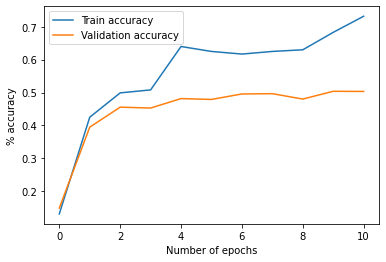

In [23]:
plt.plot(train_acc_history, label = "Train accuracy")
plt.plot(val_acc_history, label = "Validation accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("% accuracy")

plt.legend()
plt.show()

# Optional Exercise

Neural Network models include a lot of hyperparameters. These parameters are not learnt, but the choice for these are left to the designer/programmer. Model architecture is a hyperparameter. In this problem, we've provided you the model architecture - number of hidden layers, number of nodes in each hidden layer, choice of activation function, etc. Let's keep them fixed for now. We might explore tuning these in future.


There is another set of hyper-parameters associated with the training process - learning rate of the gradient descent algorithm, learning rate decay, number of training epochs, batch size (this is an important one).
Try tuning these hyperparameters. You can use validation accuracy to choose the values (Good hyperparameters should give higher validation accuracy).


Evaluate your acurracy of your new trained model on test set, and compare with previous result.

# Problem 1.2: Convolutional Neural Network
In this problem you will train a network with the following architecture: conv - relu - 2x2 max pool - fc - relu - fc - softmax, and test it out on the MNIST dataset.

The outputs of the last fully connected layer are the scores for each class.

You cannot use any deep learning libraries such as PyTorch in this part.

GREAT RESOURCE: https://cs231n.github.io/convolutional-networks/

## Layers
In this part, we implement the layers you need for your network.

Hint - Think about efficient implementation here, you should never be required to loop over batch_size dimension. A naive implementation will take over 30 minutes to run, efficient implementation can reduce the runtime 10-fold.

In [24]:
def conv_forward(x, w):
    """
    The input consists of N data points, each with C channels, height H and
    width W. We filter each input with F different filters, where each filter
    spans all C channels and has height HH and width WW.
    You'll be implementing "valid" convolution here (no padding)
    
    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
      H' = H - HH + 1
      W' = W - WW + 1
    - cache: (x, w)
    """
    out = None
    ###########################################################################
    # TODO: Implement the convolutional forward pass.                         #
    ###########################################################################
    # Extract shapes and constants
    
    (N, C, H, W) = x.shape
    (F, C, HH, WW) = w.shape
    H_prime = H - HH + 1
    W_prime = W - WW + 1
    x = x.reshape((N,1, C, H, W))
    w = w.reshape((1, F, C, HH, WW))
    out = np.zeros((N,F,H_prime, W_prime))
    for h in range(H_prime):
      for j in range(W_prime):
        multiplication = np.multiply(x[:,:,:,h:h+HH,j:j+WW],w)
        out[:,:, h, j] = np.sum(multiplication, axis = (2,3,4))
    x = x.reshape((N,C,H,W))
    w = w.reshape((F,C,HH,WW))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w)
    return out, cache

def conv_backward(dout, cache):
    """
    Inputs:
    - dout: Upstream derivatives.
    - cache: A tuple of (x, w) as in conv_forward
    Returns a tuple of:
    - dx: Gradient with respect to x, shape (N, C, H, W)
    - dw: Gradient with respect to w, shape (F, C, HH, WW)
    """
    dx, dw = None, None
    ###########################################################################
    # TODO: Implement the convolutional backward pass.                        #
    ###########################################################################
    (x, w) = cache
    (N, C, H, W) = x.shape
    (F, C, HH, WW) = w.shape
    dx = np.zeros(x.shape)
    dw = np.zeros(w.shape)
    N, F, prev_H, prev_W = dout.shape
    for h in range(prev_H):
      for j in range(prev_W):
        dx[:,:,h:h + HH, j:j + WW] += np.sum(w[None,:,:,:,:] * dout[:,:,h,j][:,:,None, None, None], axis = 1)
        dw += np.sum(x[:,None,:,h:h + HH, j:j + WW] * dout[:,:,h,j][:,:,None, None, None], axis = 0)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw
  

def max_pool_forward(x, pool_param):
    """
    A naive implementation of the forward pass for a max-pooling layer.
    Inputs:
    - x: Input data, of shape (N, C, H, W)
    - pool_param: dictionary with the following keys:
      - 'pool_height': The height of each pooling region
      - 'pool_width': The width of each pooling region
      - 'stride': The distance between adjacent pooling regions
    No padding is necessary here. Output size is given by 
    Returns a tuple of:
    - out: Output data, of shape (N, C, H', W') where H' and W' are given by
      H' = 1 + (H - pool_height) / stride
      W' = 1 + (W - pool_width) / stride
    - cache: (x, pool_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the max-pooling forward pass                            #
    ###########################################################################
    N, C, H, W = x.shape
    pool_height = pool_param['pool_height']
    pool_width = pool_param['pool_width']
    stride = pool_param['stride']
    H_prime = 1 + ((H - pool_height) // stride)
    W_prime = 1 + ((W - pool_width) // stride)
    out = np.zeros((N, C, H_prime, W_prime))
    for h in range(H_prime):
      for w in range(W_prime):
        small_region = x[:, :, h * stride: h * stride + pool_height, w * stride: w * stride + pool_width]
        out[:, :, h, w] = np.max(small_region, axis = (2,3))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, pool_param)
    return out, cache

def max_pool_backward(dout, cache):
    """
    A naive implementation of the backward pass for a max-pooling layer.
    Inputs:
    - dout: Upstream derivatives
    - cache: A tuple of (x, pool_param) as in the forward pass.
    Returns:
    - dx: Gradient with respect to x
    """
    dx = None
    ###########################################################################
    # TODO: Implement the max-pooling backward pass                           #
    ###########################################################################
    x, pool_param = cache
    N,C,H,W = x.shape
    stride = pool_param['stride']
    pool_height = pool_param['pool_height']
    pool_width = pool_param['pool_width']

    H_prime = 1 + (H - pool_height) // stride
    W_prime = 1 + (W - pool_width) // stride
    
    dx = np.zeros_like(x)
    for h in range(H_prime):
      for w in range(W_prime):
          small_region_x = x[:, :, h * stride: h * stride + pool_height, w * stride: w * stride + pool_width]
          max_values = np.max(small_region_x, axis=(2,3))
          indicator_matrix = small_region_x == max_values
          dx[:,:, h * stride: h * stride + pool_height, w * stride: w * stride + pool_width] += dout[:,:,h,w][:,:,None, None] * indicator_matrix
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx
def fc_forward_CNN(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    
    The input x has shape (N, Din) and contains a minibatch of N
    examples, where each example x[i] has shape (Din,).
    
    Inputs:
    - x: A numpy array containing input data, of shape (N, Din)
    - w: A numpy array of weights, of shape (Din, Dout)
    - b: A numpy array of biases, of shape (Dout,)
    
    Returns a tuple of:
    - out: output, of shape (N, Dout)
    - cache: (x, w, b)
    """
    ###########################################################################
    # TODO: Implement the forward pass. Store the result in out.              #
    ###########################################################################
    
    x_reshaped = x.reshape(x.shape[0], -1)
    fc_output = np.dot(x_reshaped, w) + b
    cache = (x, w, b)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return fc_output, cache

def fc_backward_CNN(dout,cache):
    x, w, b = cache
    x_reshaped = x.reshape(x.shape[0], -1)
    dx = np.dot(dout,w.T)
    dx = dx.reshape(x.shape)
    dw = np.dot(np.transpose(x_reshaped), dout)
    db = np.sum(dout,0)
    return dx, dw, db


#  CNN Classifier

In this problem, implement ConvNet.

In [25]:
class ConvNet(object):
  """
  A convolutional network with the following architecture:
  
  conv - relu - 2x2 max pool - fc - relu - fc - softmax 
  
  The network operates on minibatches of data that have shape (N, C, H, W)
  consisting of N images, each with height H and width W and with C input
  channels.
  """
  
  def __init__(self, input_dim=(1, 28, 28), num_filters=32, filter_size=7,
               hidden_dim=100, num_classes=10, weight_scale=1e-3, dtype=np.float32):
    """
    Initialize a new network.
    
    Inputs:
    - input_dim: Tuple (N, C, H, W) giving size of input data
    - num_filters: Number of filters to use in the convolutional layer
    - filter_size: Size of filters to use in the convolutional layer
    - hidden_dim: Number of nodes to use in the fully-connected hidden layer
    - num_classes: Number of unique classification labels.
    - weight_scale: Scalar giving standard deviation for random initialization
      of weights.
    - dtype: numpy datatype to use for computation.
    """
    self.params = {}
    self.dtype = dtype

    
    ############################################################################
    # TODO: Initialize weights and biases for the three-layer convolutional    #
    # network. Weights should be initialized from a Gaussian with standard     #
    # deviation equal to weight_scale; biases should be initialized to zero.   #
    # All weights and biases should be stored in the dictionary self.params.   #
    # Store weights for the convolutional layer using the keys 'W1' (here      #
    # we do not consider the bias term in the convolutional layer);            #
    # use keys 'W2' and 'b2' for the weights and biases of the                 #
    # hidden fully-connected layer, and keys 'W3' and 'b3' for the weights     #
    # and biases of the output affine layer.                                   #
    ############################################################################
    W1 = np.random.normal(0, weight_scale, size=(num_filters, input_dim[0], filter_size, filter_size))
    W2 = np.random.normal(0, weight_scale, size=(3872, hidden_dim))
    b2 = np.zeros(hidden_dim)
    W3 = np.random.normal(0, weight_scale, size=(hidden_dim, num_classes))
    b3 = np.zeros(num_classes)


    self.params['W1'] = W1
    self.params['W2'] = W2
    self.params['W3'] = W3
    self.params['b2'] = b2
    self.params['b3'] = b3
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    for k, v in self.params.items():
      self.params[k] = v.astype(dtype)
     
 
  def forwards_backwards(self, X, y=None):
    """
    Evaluate loss and gradient for the three-layer convolutional network.
    
    Input / output: Same as forwards_backwards function in MLPClassifier above.
    """
    W1 = self.params['W1']
    W2, b2 = self.params['W2'], self.params['b2']
    W3, b3 = self.params['W3'], self.params['b3']
    
    # pass pool_param to the forward pass for the max-pooling layer
    pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

    scores = None
    ############################################################################
    # TODO: Implement the forward pass for the three-layer convolutional net,  #
    # computing the class scores for X and storing them in the scores          #
    # variable. You can use fc-layer and softmax_loss functions from before.

    # Hint - In forwards pass, think about reshaping when passing output from 
    # max-pool layer to FC layer. In backwards pass, again think about reshaping
    # the upstream gradient from fc-layer to max-pool layer.
    ############################################################################
    result_after_conv, cache1 = conv_forward(X, W1)
    result_after_relu, cache2 = relu_forward(result_after_conv)
    result_after_pooling, cache3 = max_pool_forward(result_after_relu, pool_param)
    pool_shape = result_after_pooling.shape
    result_after_pooling = result_after_pooling.reshape((result_after_pooling.shape[0], -1))
    result_after_fc, cache4 = fc_forward_CNN(result_after_pooling, W2, b2)
    relu_out, cache5 = relu_forward(result_after_fc)
    scores,cache6 = fc_forward(relu_out, W3, b3)

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    
    if y is None:
      return scores
    grads = {}
    ############################################################################
    # TODO: Implement the backward pass for the three-layer convolutional net, #
    # storing the loss and gradients in the loss and grads variables. Compute  #
    # loss using softmax_loss function implemented before, and make sure that 
    # grads[k] holds the gradients for self.params[k].                         #
    ############################################################################
    loss, dscores = softmax_loss(scores, y)

    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    dh6, dw6, db6 = fc_backward_CNN(dscores, cache6)

    dx5 = relu_backward(dh6, cache5)

    # dh4 = np.dot(dx5, cache4[1].T)
    # dw4 = np.einsum('ijkm,mkjh->ih', cache4[0].T, dx5)
    # db4 = np.sum(dx5, axis=0)
    dh4, dw4, db4 = fc_backward_CNN(dx5, cache4)
    dh4 = dh4.reshape(pool_shape)
    dx3 = max_pool_backward(dh4, cache3)
    dx2 = relu_backward(dx3, cache2)
    dx,dw = conv_backward(dx2, cache1)

    grads['W3'] = dw6
    grads['W2'] = dw4
    grads['W1'] = dw
    grads['b2'] = db4
    grads['b3'] = db6
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    
    return loss, grads

# Training and evaluation functions
In the following section, we provide you helper functions to train your neural network model and evaluate your trained model on test/validation set. 

You are not required to implement anything here.

In [26]:
def test_network(model, X, y, num_samples=None, batch_size=100):
    """
    Check accuracy of the model on the provided data.

    Inputs:
    - model: Image classifier
    - X: Array of data, of shape (N, d_1, ..., d_k)
    - y: Array of labels, of shape (N,)
    - num_samples: If not None, subsample the data and only test the model
      on num_samples datapoints.
    - batch_size: Split X and y into batches of this size to avoid using
      too much memory.

    Returns:
    - acc: Scalar giving the fraction of instances that were correctly
      classified by the model.
    """

    # Subsample the data
    N = X.shape[0]
    if num_samples is not None and N > num_samples:
        mask = np.random.choice(N, num_samples)
        N = num_samples
        X = X[mask]
        y = y[mask]

    # Compute predictions in batches
    num_batches = N // batch_size
    if N % batch_size != 0:
        num_batches += 1
    y_pred = []
    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        scores = model.forwards_backwards(X[start:end])
        y_pred.append(np.argmax(scores, axis=1))
    y_pred = np.hstack(y_pred)
    acc = np.mean(y_pred == y)

    return acc


def train_network(model, data, **kwargs):
    """
     Required arguments:
    - model: Image classifier
    - data: A dictionary of training and validation data containing:
      'X_train': Array, shape (N_train, d_1, ..., d_k) of training images
      'X_val': Array, shape (N_val, d_1, ..., d_k) of validation images
      'y_train': Array, shape (N_train,) of labels for training images
      'y_val': Array, shape (N_val,) of labels for validation images

    Optional arguments:
    - learning_rate: A scalar for initial learning rate.
    - lr_decay: A scalar for learning rate decay; after each epoch the
      learning rate is multiplied by this value.
    - batch_size: Size of minibatches used to compute loss and gradient
      during training.
    - num_epochs: The number of epochs to run for during training.
    - print_every: Integer; training losses will be printed every
      print_every iterations.
    - verbose: Boolean; if set to false then no output will be printed
      during training.
    - num_train_samples: Number of training samples used to check training
      accuracy; default is 1000; set to None to use entire training set.
    - num_val_samples: Number of validation samples to use to check val
      accuracy; default is None, which uses the entire validation set.
    """
    
    
    learning_rate =  kwargs.pop('learning_rate', 1e-3)
    lr_decay = kwargs.pop('lr_decay', 1.0)
    batch_size = kwargs.pop('batch_size', 100)
    num_epochs = kwargs.pop('num_epochs', 10)
    num_train_samples = kwargs.pop('num_train_samples', 200)
    num_val_samples = kwargs.pop('num_val_samples',200)
    print_every = kwargs.pop('print_every', 10)   
    verbose = kwargs.pop('verbose', True)
    
    epoch = 0
    best_val_acc = 0
    best_params = {}
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    
    num_train = data['X_train'].shape[0]
    iterations_per_epoch = max(num_train // batch_size, 1)
    num_iterations = num_epochs * iterations_per_epoch
    num_iterations = 60

    
    for t in range(num_iterations):
        # Make a minibatch of training data
        batch_mask = np.random.choice(num_train, batch_size)
        X_batch = data['X_train'][batch_mask]
        y_batch = data['y_train'][batch_mask]
        # Compute loss and gradient
        loss, grads = model.forwards_backwards(X_batch, y_batch)
        loss_history.append(loss)

        # Perform a parameter update
        for p, w in model.params.items():
            model.params[p] = w - grads[p]*learning_rate
          
        # Print training loss
        if verbose and t % print_every == 0:
            print('(Iteration %d / %d) loss: %f' % (
                   t + 1, num_iterations, loss_history[-1]))
         
        # At the end of every epoch, increment the epoch counter and decay
        # the learning rate.
        epoch_end = (t + 1) % iterations_per_epoch == 0
        if epoch_end:
            epoch += 1
            learning_rate *= lr_decay
        
        
        # Check train and val accuracy on the first iteration, the last
        # iteration, and at the end of each epoch.
        first_it = (t == 0)
        last_it = (t == num_iterations - 1)
        if first_it or last_it or epoch_end:
            train_acc = test_network(model, data['X_train'], data['y_train'],
                num_samples= num_train_samples)
            val_acc = test_network(model, data['X_val'], data['y_val'],
                num_samples=num_val_samples)
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
           

            if verbose:
                print('(Epoch %d / %d) train acc: %f; val_acc: %f' % (
                       epoch, num_epochs, train_acc, val_acc))

            # Keep track of the best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = {}
                for k, v in model.params.items():
                    best_params[k] = v.copy()
   
    model.params = best_params
        
    return model, train_acc_history, val_acc_history





## Train your model

Here you'll load MNIST dataset from keras modules and train your ConvNet model.

Run this cell to run training. You're not required to implement anything here.

In [27]:
np.random.seed(100)
# load data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_data = { 'X_train':x_train[:,None,:,:], 'X_val': x_test[:,None,:,:], 'y_train': y_train, 'y_val': y_test}

# initialize model
model = ConvNet(hidden_dim =250, weight_scale=1e-2)

# start training    
model, train_acc_history, val_acc_history = train_network(
    model, train_data, learning_rate = 0.001,
    lr_decay=.95, num_epochs=1, 
    batch_size=64, print_every=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:135: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


(Iteration 1 / 60) loss: -2.228580
(Epoch 0 / 1) train acc: 0.125000; val_acc: 0.145000
(Iteration 2 / 60) loss: -0.208589
(Iteration 3 / 60) loss: 0.100517
(Iteration 4 / 60) loss: 0.114356
(Iteration 5 / 60) loss: 0.003654
(Iteration 6 / 60) loss: 0.063125
(Iteration 7 / 60) loss: 0.034307
(Iteration 8 / 60) loss: -0.122917
(Iteration 9 / 60) loss: -0.013779
(Iteration 10 / 60) loss: 0.120061
(Iteration 11 / 60) loss: 0.027898
(Iteration 12 / 60) loss: 0.002820
(Iteration 13 / 60) loss: -0.044402
(Iteration 14 / 60) loss: 0.054101
(Iteration 15 / 60) loss: -0.000169
(Iteration 16 / 60) loss: 0.030289
(Iteration 17 / 60) loss: -0.076589
(Iteration 18 / 60) loss: 0.112569
(Iteration 19 / 60) loss: -0.027746
(Iteration 20 / 60) loss: -0.075704
(Iteration 21 / 60) loss: -0.006154
(Iteration 22 / 60) loss: -0.064588
(Iteration 23 / 60) loss: 0.091008
(Iteration 24 / 60) loss: -0.075525
(Iteration 25 / 60) loss: -0.015772
(Iteration 26 / 60) loss: 0.041046
(Iteration 27 / 60) loss: -0.0193

# Report final Validation Accuracy

Since we didn't define a separate test set here, we just ask you to report the final validation accuracy after training is complete.

Run the cell below. If you implemented everything correctly, you should atleast 75% final validation accuracy.

In [28]:
# report final validation accuracy
print('Final Validation accuracy = ', val_acc_history[-1])

Final Validation accuracy =  0.78


Optional Exercise - You may experiment with the ConvNet architecture used above by adding a dropout layer or batch normalization layer. 

You can read about batch normalization and dropout layers here - https://cs231n.github.io/neural-networks-2/#batchnorm

Retrain your new ConvNet with MNIST data and compare final validation accuracies.